In [1]:
import pandas_datareader as web
import mplfinance as mpf
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [17]:
currency = "USD"
metric = "Close" # only want closing price

# date range
start = dt.datetime(2020, 1, 1)
end = dt.datetime.now()

# altcoins
crypto = ["ADA", "XRP", "XLM", "BAT"]

In [18]:
colnames = []
first = True

for ticker in crypto:
    data = web.DataReader(f"{ticker}-{currency}", "yahoo", start, end)
    if first:
        combined = data[[metric]].copy()
        colnames.append(ticker)
        combined.columns = colnames
        first = False
    else:
        combined = combined.join(data[metric])
        colnames.append(ticker)
        combined.columns = colnames
        
colnames

['ADA', 'XRP', 'XLM', 'BAT']

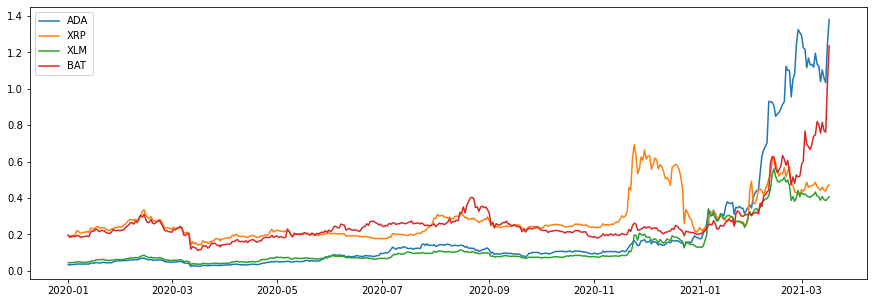

In [19]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 5))

for ticker in crypto:
    plt.plot(combined[ticker], label=ticker)

plt.legend(loc="upper left")

plt.show()

                 ADA       XRP       XLM       BAT
Date                                              
2020-01-01  0.033458  0.192667  0.045451  0.196129
2020-01-02  0.032751  0.188043  0.044112  0.183821
2020-01-03  0.034180  0.193521  0.045234  0.187701
2020-01-04  0.034595  0.194355  0.046272  0.189891
2020-01-05  0.034721  0.195537  0.045359  0.188898
...              ...       ...       ...       ...
2021-03-13  1.103314  0.459924  0.408264  0.815245
2021-03-14  1.059154  0.442112  0.391533  0.770341
2021-03-15  1.033539  0.437555  0.385499  0.761019
2021-03-16  1.242953  0.462600  0.395747  1.029075
2021-03-17  1.380969  0.471965  0.406340  1.235515

[452 rows x 4 columns]


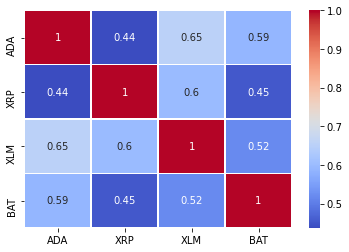

In [20]:
print(combined)

combined = combined.pct_change().corr(method="pearson")

sns.heatmap(combined, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()